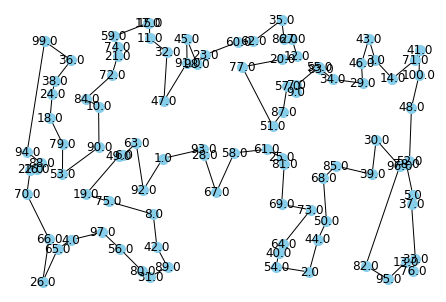

In [33]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import re

with open ("files/kroa100.tsp", "r") as myInfile:
    input=myInfile.readlines()
    
with open ("files/kroa100.opt.tour", "r") as myOutfile:
    output=myOutfile.readlines()
    
 
# Build a dataframe with your connections
df = pd.DataFrame()
output[5] = re.sub('[\n]', '', output[5])
for i in range(len(output)-8):
    output[i+6] = re.sub('[\n]', '', output[i+6])
    dfAppend = pd.DataFrame({ 'from':[float(output[i+5])], 'to':[float(output[i+6])]})
    df=df.append(dfAppend)
dfAppend = pd.DataFrame({ 'from':[float(output[i+6])], 'to':[float(output[5])]})
df=df.append(dfAppend)
input[7] = re.sub('[\n]', '', input[7])
coordinates= pd.DataFrame({0:[input[7].split(" ")[1],input[7].split(" ")[2]]})
for i in range(len(input)-8):
    input[i+7] = re.sub('[\n]', '', input[i+7])
    serie=[input[i+7].split(" ")[1],input[i+7].split(" ")[2]]
    serie= map(float, serie)
    coordinates[i+1]=pd.Series(serie, index=coordinates.index)
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Fruchterman Reingold
nx.draw(G, with_labels=True, node_size=100, node_color="skyblue", pos=coordinates)